<a href="https://colab.research.google.com/github/lordkevinmo/clothing_classification/blob/master/cnn_fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
Created on Fri Mar  8 22:01:14 2019


@author: Koffi Moïse AGBENYA

Inspired by a lab organized by udacity

Here! I create a Convolutionnal neural network (CNNs) in order to classify an
images dataset. The dataset is composed by the MNIST fashion dataset available 
through Tensorflow dataset package. I am comparing at end the results of its accuracy
with the previous Neural network composed by Densely connected layer.

"""
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [4]:
"""
The images are 28  ×  28 arrays, with pixel values in the range [0, 255].
The labels are an array of integers, in the range [0, 9]. These correspond to
the class of clothing the image represents:

Label Class
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
Each image is mapped to a single label. Since the class names are not included with
the dataset, store them here to use later when plotting the images:
"""
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [2]:
!pip install tensorflow_datasets

    100% |████████████████████████████████| 409kB 6.9MB/s 


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
"""
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the 
training set, and 10000 images in the test set:
"""
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

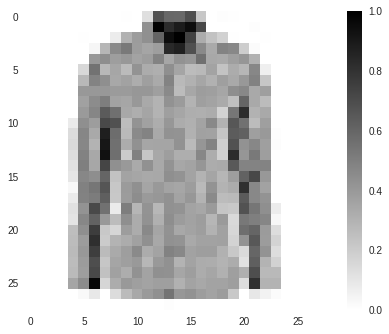

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

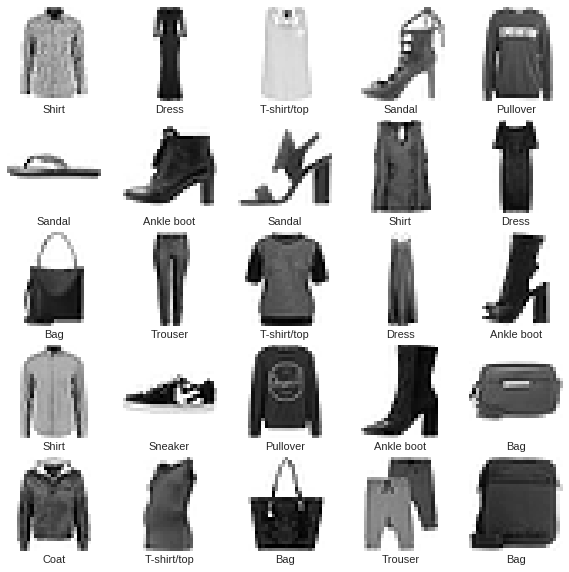

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
#Building the neural network requires configuring the layers of the model, then compiling the model.
"""
The basic building block of a neural network is the layer. A layer extracts a representation from the
data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful
for the problem at hand.
Much of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense,
have internal parameters which are adjusted ("learned") during training.
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
"""
First, we define the iteration behavior for the train dataset:

Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.
Training is performed by calling the model.fit method:
"""
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
"""
Feed the training data to the model using train_dataset.
The model learns to associate images and labels.
The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.
"""
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4066 - acc: 0.8513
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2608 - acc: 0.9035
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2157 - acc: 0.9215
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1866 - acc: 0.9310
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1574 - acc: 0.9420


In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32)) #Comparing how the model perform in the test
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.2431 - acc: 0.9151
Accuracy on test dataset: 0.9151


In [0]:
#Make prediction and explore
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0] #Make prediction

array([8.5289816e-05, 9.1081745e-07, 4.4710282e-03, 8.4192969e-04,
       9.7242333e-02, 1.5615781e-07, 8.9735806e-01, 8.3754692e-09,
       2.7488508e-07, 7.3066396e-08], dtype=float32)

In [18]:
np.argmax(predictions[0]) #We can see which label has the highest value

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

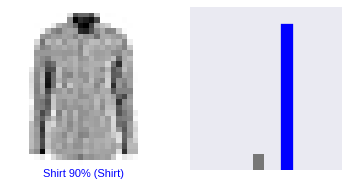

In [20]:
#Let's look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

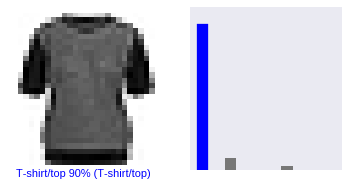

In [21]:
i = 12 #Same for the 12th image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

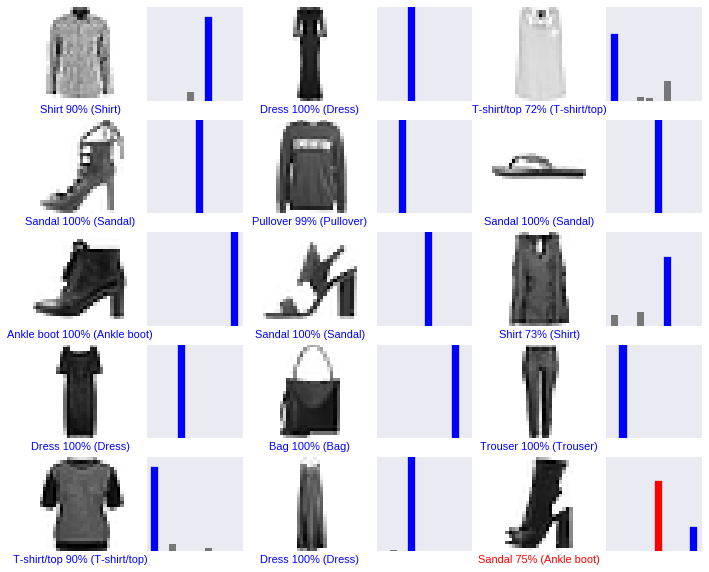

In [22]:
#Let's plot several images with their prediction
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [23]:
#Using train model to predict one image
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [24]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [25]:
#Now predict the image
predictions_single = model.predict(img)

print(predictions_single)

[[8.5289743e-05 9.1081927e-07 4.4710329e-03 8.4192882e-04 9.7242355e-02
  1.5615751e-07 8.9735806e-01 8.3754372e-09 2.7488508e-07 7.3066118e-08]]


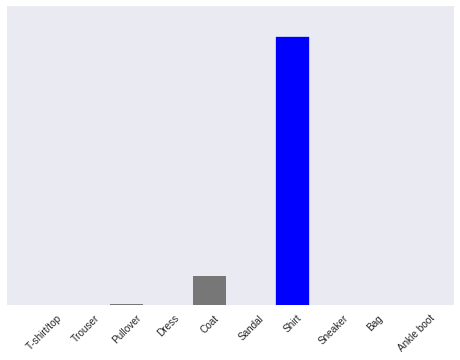

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

6